In [14]:
# Import the required modules
import numpy as np

import sympy as sp
sp.init_printing(use_latex=True)

from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt
%matplotlib inline

# Differential Equations Introduction

I have not taken a Differential Equations Class, but I have read about them in a few books, seen them in my work, and had my engineering friends say how cool they are. I've taken the liberty over the past few days to do some reading about what they are and the general ways of solving them. 

I watched one video that defined them as "any equation that has at least one derivative". There are two primary kinds of differential equations that I have heard of: 
 * Partial Differential Equations
 * Ordinary Differential Equations
 
I will only be covering Ordinary because Partials get very complicated very quickly. For most of my work, I will be using three sources: 
 * Python Programming and Numerical Methods
 * coms-reu/bootcamp/python/Part 3-B.ipynb \[mtsu notebook->https://github.com/coms-reu/boot-camp/blob/main/python/Part%203-B.ipynb \] 
 * Ordinary Differential Equations by Tennenbaum and Pollard
 
For the first major bit of this notebook, I won't be coding anything besides LaTeX and markdown. My intention is to have a basic understanding of DEs before I just start running code.


Let's get into it.

Consider this differential equation:

\begin{equation}
\frac{dy}{dx} +y=x
\end{equation}

We can say a few things about it. First, we can say that Y is a *dependent variable* because it is being differentiated with resepect to x. X is an independent variable because it can stand alone as it's not being differentiated relative to something.

I can also say that it is a first order diffential equation because the highest derivative appearing in the equation is just a first one.

Here is another example:

\begin{equation}
\frac{dx}{dt} +x=2cos(t)
\end{equation}

I can summarize it by saying it is a first order differential equation of the dependent variable x and independent variable t

# Solution of  a Differential Equation

Some differential equationsc an be either very difficult or impossible to solve. There is a *small* class of DEs that can be, however. When I say solve, I mean an exact solution. More often, you find approximations of solutions.

Typically, this is called solving differential equations Numerically. There are two methods that come to my mind
*  Euler's Method
*  Runger-Kutta Method

Unlike in something like a quadratic equation where you find specific roots...when you solve a differential equation you are really finding a function that satisifies the equation. Your answer to a DE may not be a specific coordinate or something like that. It will be a bit higher level than that.


The following function:
\begin{equation}
f(x) = log(x)+x, x > 0
\end{equation}

is a solution of 
\begin{equation}
x^2y^{''} + 2xy^{'} + y = log(x)+3x+1
\end{equation}

Here is an image depicting this
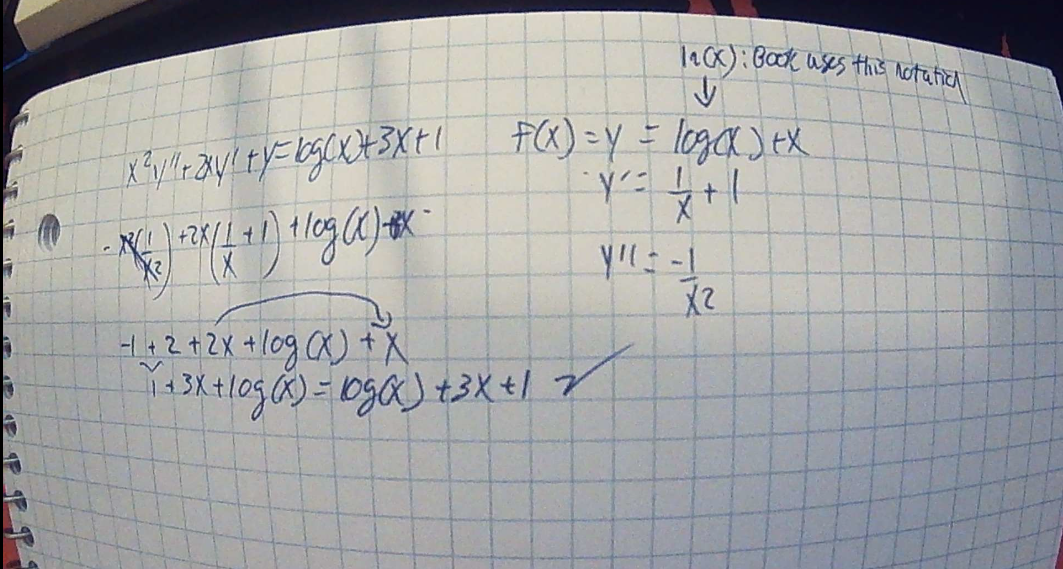



## Let's revisit a function for viewing this idea:

Ex. Verify that x = x(t) = cos(t)+sin(t) is a solution of

\begin{equation}
\frac{dx}{dt} +x=2cos(t)
\end{equation}

The way you would start this is taking the derivative of x(t)=cos(t)+sin(t). 

\begin{equation}
\frac{dx}{dt}= -sin(t) + cos(t)
\end{equation}

You can take this and replace the derivative notation and x respectively to get:

\begin{equation}
\frac{dx}{dt} +x = -sin(t) + cos(t) + cos(t)+sin(t) \\
= -sin(t) + cos(t) + cos(t)+sin(t)\\
= cos(t) + cos(t)\\
= 2cos(t)
\end{equation}

As you can see, that result equals our original equation. It's essential that I understand how this all works.

We could also check if cos(t) + sin(t) + e^-t is a solution.

Let's use the same process as earlier, starting with a derivative:

\begin{equation}
\frac{dx}{dt}= -sin(t) + cos(t) + -e^{-t}
\end{equation}

Plugging it back in:

\begin{equation}
\frac{dx}{dt} +x =  -sin(t) + cos(t) + -e^{-t} + sin(t) + cos(t) + e^{-t} \\
= -sin(t) +sin(t) + cos(t) + cos(t) -e^{-t}+ e^{-t}\\
= cos(t) + cos(t)\\
= 2cos(t)
\end{equation}

As you can probably deduce, no matter what I put in front of that e will result in a 2cost(t). For this reason we can define
\begin{equation}
x=cos(t)+sin(t)-Ce^{-t}
\end{equation}
as the *general solution*. General solutions let you find particular solutions

Ex. Find a solution such that x(0)=-1
\begin{equation}
x(0)= cos(0)+sin(0)+Ce^0 = -1 \\
1+C=-1, C=-2
\end{equation}

I wrote this simple code below to show how changing the C affects particular solutions. It's quite interesting to see how they all seem to "synchronize".

It's worth noting here that the order of the Differential equation determines the count of C's. First order = 1 C, third order = 3 C, ...

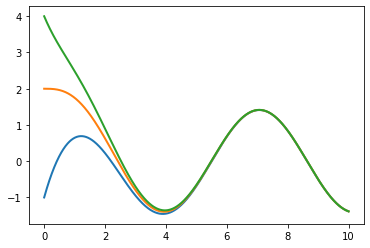

In [18]:
pointsGENd=1000
xaxis=np.linspace(0,10, pointsGENd)

c1=np.zeros(pointsGENd)
c2=np.zeros(pointsGENd)
c3=np.zeros(pointsGENd)
for i,each in enumerate(xaxis):
    c1[i] = np.cos(each)+np.sin(each) + -2* (2.718281828459045**(-each) )
    c2[i] = np.cos(each)+np.sin(each) + 1*( 2.718281828459045**(-each) )
    c3[i] = np.cos(each)+np.sin(each) + 3* (2.718281828459045**(-each) )

fig, ax = plt.subplots()
ax.plot(xaxis, c1, linewidth=2.0)
ax.plot(xaxis, c2, linewidth=2.0)
ax.plot(xaxis, c3, linewidth=2.0)
plt.show()

### A Few Extra Notes
Solutions of a DE may not necessarily be unique. When 'Solving' a DE, it means to find all the solutions i.e. the general solution.

There are four fundamental model equations in Diff EQ
* Exponential growth [https://amsi.org.au/ESA_Senior_Years/SeniorTopic3/3e/3e_2content_1.html#:~:text=x%3Dek(t%E2%88%92c).&text=where%20C%20is%20any%20positive,shown%20in%20the%20following%20graphs.]
dy/dx = ky, y(x)=Ce^kx


* Exponential Decay [https://amsi.org.au/ESA_Senior_Years/SeniorTopic3/3e/3e_2content_1.html#:~:text=x%3Dek(t%E2%88%92c).&text=where%20C%20is%20any%20positive,shown%20in%20the%20following%20graphs.]
dy/dx = ky, y(x)=Ce^-kx


* Simple Harmonic Motion [https://amsi.org.au/ESA_Senior_Years/SeniorTopic3/3g/3g_2content_6.html#:~:text=d2xdt2%3D%E2%88%92kmx.,)%2C%20the%20shorter%20the%20period.]
d2y/d2x = -k^2*y, y(x) = Acos(kx) + Bsin(kx)


* Hybrid Exponential Growth-Decay [https://amsi.org.au/ESA_Senior_Years/SeniorTopic3/3e/3e_2content_1.html#:~:text=x%3Dek(t%E2%88%92c).&text=where%20C%20is%20any%20positive,shown%20in%20the%20following%20graphs.]
d2y/d2x = k^2*y, y(x) = Ae^kx +Be^-kx or y(x) A cosh(kx)+Bsinh(kx)

What I have shown in the notebook is often called finding an explicit solution of a differential equation. There's also a concept known as *implicitly* solving a differential equation. The main difference is the following:

* An explicit solution states f(x) is a solution of a DE F(x, y, y'', y'''...y(n))=0 if F\[x, f(x), f'(x)...\]=0
* An implicit solution states f(x) is a solution of a DE F(x, y, y'', y'''...y(n))=0 if F\[x, g(x), g'(x)...\]=0

Implicit solutions require implicit differentiation, which I didn't actually remember all that well from my Calc 1 back in high school.

I think knowing these fundamentals are probably enough for me to have a basic understanding of what's going on when I'm coding solutions to Differential Equations


## Solving Differential Equations Symbollically
I will first demonstrate solving Differential Equations symbolically. This is very nice if you know the equations beforehand, but I am not sure how it does in terms of performance.

I'll use the following function:
\begin{equation}
\frac{dx}{dt} +x=2cos(t) ,\ x(0)=1
\end{equation}


Symbolically solving differential equations will be the simpler method as the other one's require a bit more analytical thought. I imagine that doing that last will be the best prep for the numerical analysis type stuff I'll be doing next

In [5]:
t = sp.symbols('t') # define a symbol, i.e independent variable 
x = sp.Function('x') # defining function, x(t). THe dependent variable as it's the numerator of my dx/dt
eq =sp.Eq(x(t).diff(t)+x(t), 2*sp.cos(t)) # creating my equation. I get a sympy Equation object which I can use in more than one way
eq

In [7]:
solved = sp.dsolve(eq) # differential equation solve
solved

In [9]:
# here I am placing in my initial values
solved.subs(t,0).subs(x(0),1)

In [12]:
# now i can solve for the constant
c1 = sp.solve(solved.subs(t,0).subs(x(0),1), 'C1')[0] # that C1 on the end 
c1 

#Answer is kinda obvious

In [11]:
finalsol = sp.simplify(solved.subs('C1', c1))
finalsol

I think the symbolic solving stuff is actually pretty clear. It does all my least favorite parts of math for me and ends up getting something that can be solved using something more numerically later. Not a bad setup!

## Numerically Solving Differential Equations
\begin{equation}
\frac{dy}{dx} + y = x ,\ y(0)=1
\end{equation}

If I can define this function in terms of dy/dx, i.e.
\begin{equation}
\frac{dy}{dx}= x -y,y(0)=1
\end{equation}

I can define a python function that returns it and then pass that to scipy odeint \
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html
* Following syntax
* dy/dt = func(y,t)

I could also use solve_ivp which does the same exact thing but is newer:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp
* Following syntax:
* dy/dt = f(t,y)
* y(t0) = y0

In [26]:
# USing the example above!
def dy_dx(y,x):
    return x-y
xs = np.linspace(0,10, 150)
y0=1
"""
odeint requires the following parameters:
    func: callable function (y,t) or t(y) <- if that option, use tfirst=True
    y0: Initial condition
    t: sequence of time points to solve for y. monotonically increasing or decreasing
    tfirst: my t variable is first
"""
ys=odeint(dy_dx, y0, xs)
# what this returns is a vector of y points derived from solving the differential equation at each time step xs
ys[:10] # only showing a slice

array([[1.        ],
       [0.93729113],
       [0.88300924],
       [0.83660734],
       [0.79757392],
       [0.76543074],
       [0.73973048],
       [0.72005493],
       [0.70601303],
       [0.69723908]])

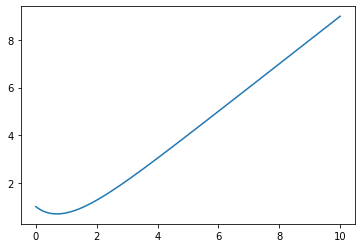

In [18]:
plt.plot(xs,ys)
# plotting to show this

### Alternate Method

In [60]:
# same exact method, just a different name
def dupe_dy_dx(x,y):
    return x-y

# Notice no linspace this time
"""
solve_ivp
    func: callable
    range: range to solve over
    initial condition of system [can specify more than one]
"""
solutionobj=solve_ivp(dupe_dy_dx, [0,10],[1,7], method='LSODA')
solutionobj

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 58
     njev: 1
      nlu: 1
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.03147029,  0.06294058,  0.19571049,  0.3284804 ,
        0.46125031,  0.69735243,  0.93345454,  1.16955666,  1.40565877,
        1.74036301,  2.07506724,  2.40977148,  2.74447571,  3.16932878,
        3.59418185,  4.01903491,  4.44388798,  4.86874105,  5.41874105,
        5.96874105,  6.51874105,  7.06874105,  7.64374105,  8.21874105,
        8.79374105,  9.36874105,  9.94374105, 10.        ])
 t_events: None
        y: array([[1.        , 0.97044813, 0.94275812, 0.84148272, 0.76935942,
        0.72274926, 0.69415183, 0.72070938, 0.7912655 , 0.89667356,
        1.09188491, 1.32664059, 1.58979562, 1.87330951, 2.25339934,
        2.64908968, 3.05505644, 3.46745162, 3.88413584, 4.42766706,
        4.97392931, 5.52170487, 6.07042562, 6.6446689 , 7.21926859,
        7.79404884, 8.3689195 , 8.9

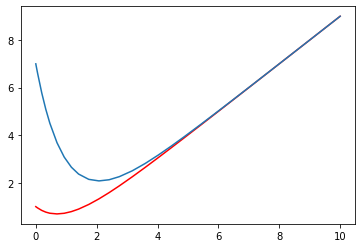

In [61]:
plt.plot(solutionobj.t,solutionobj.y[0], color='r')
plt.plot(solutionobj.t,solutionobj.y[1]) # getting my second initial condition here

Once again, this isn't too bad as far as function calls go. The neat thing about solve_ivp is you can specify what solver you want to use. I put LSODA because that is the one odeint uses from ODEPACK. You can see by the red line comparison to the odeint stuff that they're pretty much identical